In [319]:
#data visualization libraray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
#For warnings
import warnings
warnings.filterwarnings("ignore")

In [321]:
#For Train and test split
from sklearn.model_selection import train_test_split

#For scalling for normalization
from sklearn.preprocessing import MinMaxScaler

In [322]:
#For Building Model
#statsmodel
import statsmodels.api as sm

# Scikit learn
from sklearn.feature_selection import RFE #RECURSION FEATURE ELIMINATION
from sklearn.linear_model import LinearRegression

In [323]:
#Importing required library to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [324]:
#Compute R2_SCORE
from sklearn.metrics import r2_score

In [325]:
#reading the data from csv file
bike=pd.read_csv('G:\ML UPGRAD\BIKE SHARING ASSIGNMENT\day.csv')

In [326]:
#looking the dataset at a glance.
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [327]:
#checking the info of the bike dataset. It show for all 16 dataset  we have 730 non null counts that means no missing values for any column.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [328]:
#For double checking we going to use isnull().sum(). sum is 0 for all columns
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [329]:
#check for duplicates in the dataframe
bike=bike.drop_duplicates()

In [330]:
#no duplicates exist the shape before and after were the same 
bike.shape

(730, 16)

#### REMOVING UNNECESSARY COLUMN

1. instant has only record index 
2. dteday has date which can be compensated by year and month column.
3. casual and registered can be deleted as they can be breakup by category for cnt column.

In [331]:
# Dropping all the above mentioned columns using .drop()
# axis=1 for columns
bike=bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=False)

In [332]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### It seems like the we have numericals value in category columns, lets remap the categorical columns

In [333]:
# Remapping the season column
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [334]:
# Remapping the month column

bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [335]:
# Remapping the weekday column
bike.weekday=bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [336]:
# Remapping the weathersit column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [337]:
# Remapping the holiday column

holiday=bike['holiday'].map({1:'yes',0:'no'})

In [338]:
# Remapping the year column
year=bike['yr'].map({0:'2018',1:'2019'})

In [339]:
# Remapping the workingday column

workingday=bike['workingday'].map({1:'yes',0:'no'})

##### DATA VISUALIZATION OF CATEGORICAL COLUMN

<Axes: xlabel='season', ylabel='cnt'>

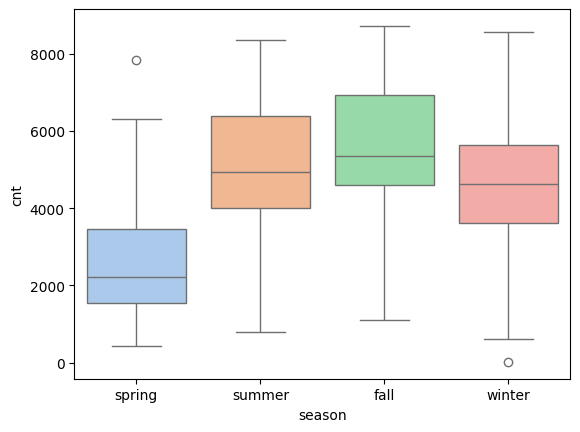

In [340]:
# It looks like we have outliner for winter and spring
sns.boxplot(x=bike.season,y=bike['cnt'],palette='pastel')

<Axes: xlabel='mnth', ylabel='cnt'>

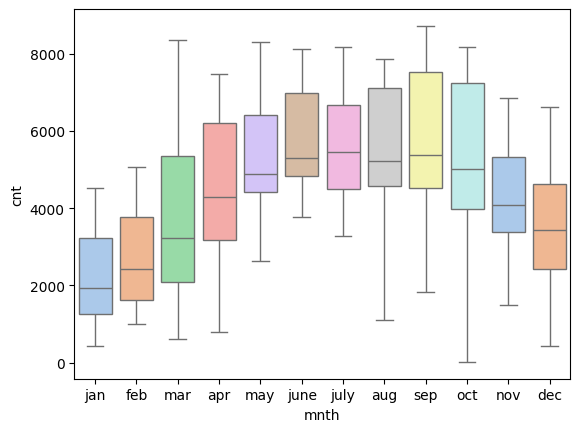

In [341]:
sns.boxplot(x=bike.mnth,y=bike['cnt'],palette='pastel')

<Axes: xlabel='weekday', ylabel='cnt'>

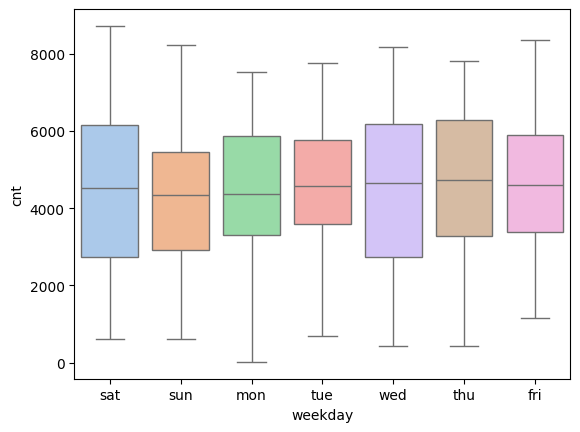

In [342]:
sns.boxplot(x=bike.weekday,y=bike['cnt'],palette='pastel')

<Axes: xlabel='weathersit', ylabel='cnt'>

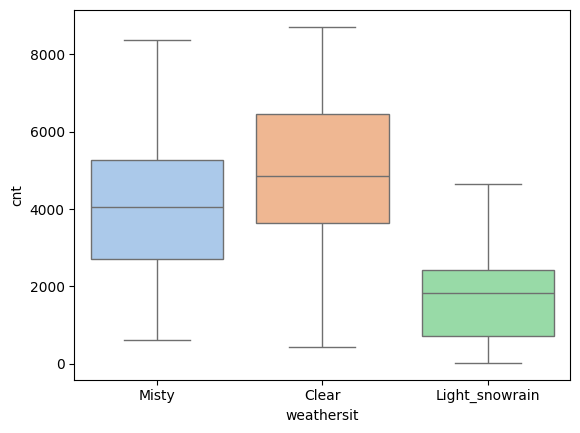

In [343]:
sns.boxplot(x=bike.weathersit,y=bike['cnt'],palette='pastel')

<Axes: xlabel='holiday', ylabel='cnt'>

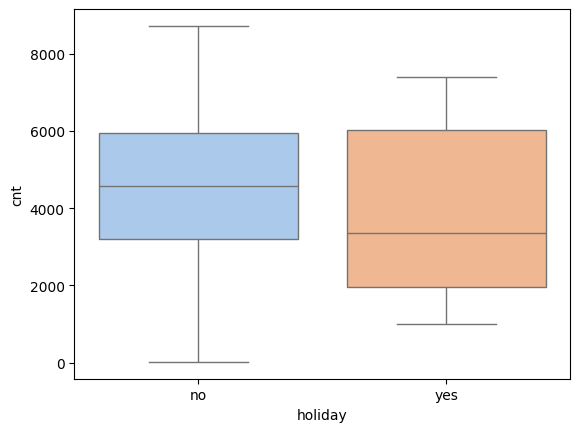

In [344]:
sns.boxplot(x=holiday,y=bike['cnt'],palette='pastel')

<Axes: xlabel='yr', ylabel='cnt'>

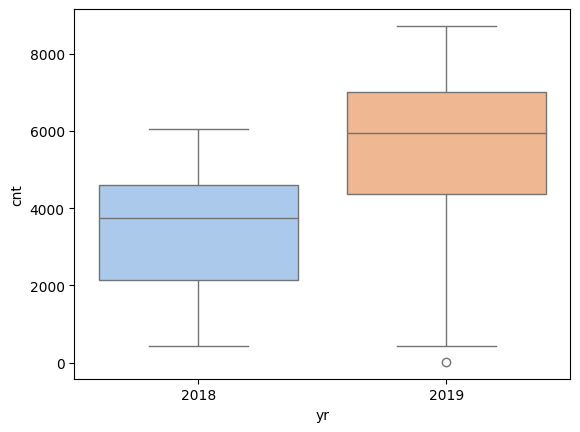

In [345]:
sns.boxplot(x=year,y=bike['cnt'],palette='pastel')

##### BIVARIATE ANALYSIS

In [346]:
def plot_bar_graph(column1,column2):
    sns.barplot(x=column1,y=bike['cnt'],hue=column2,palette='pastel')
    plt.show()

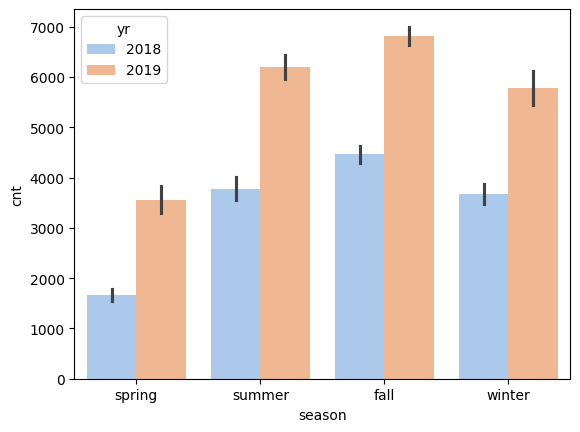

In [347]:
# number of rentals in different seasons in different year
plot_bar_graph(bike.season,year)

1. People like the autum season i.e fall we see more number of rental in that season.
2. The autum season starts from `September` till `October` so we check the count we might find the number of rentals were more in those months.
So based on the above two points we can say these two columns were positively corelated. 

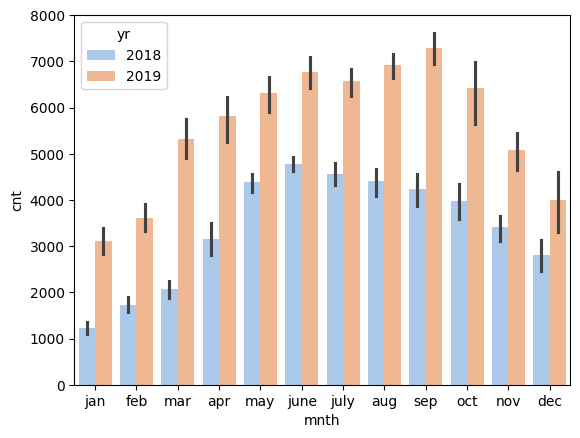

In [348]:
# number of rentals in different months in different year
plot_bar_graph(bike.mnth,year)

Through this month plot we grt more info about the hight rental counts .
1. More people like autum and late summer months which is June and early july. As we can see that in the year 2018 and 2019 the graphs
are higher comparable to other seasons.
2. Less numberof people go out in extream weather conditions
eg:  `Jan-Mar`: Colds, `Apr-May`: Extream heat wave, counts are slightly decrease in  `July-Aug` : Rain and Thunderstorm, sometimes moonsoon extends also that might be the reason we see delcine in rentals in 2018.


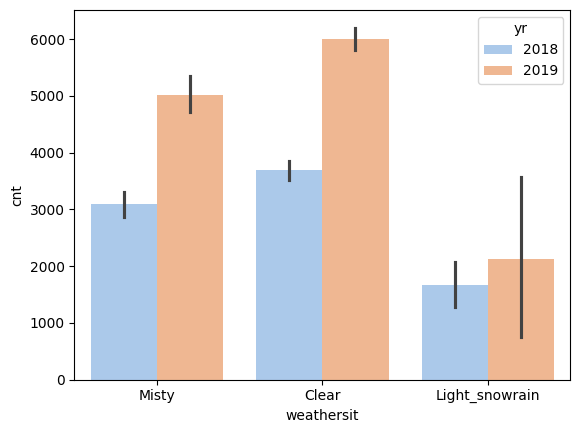

In [349]:
# number of rentals in different weathersit in different year
plot_bar_graph(bike.weathersit,year)

More number of people doesn't like extream wethear, most prefarable is `clear` sky and `Misty`

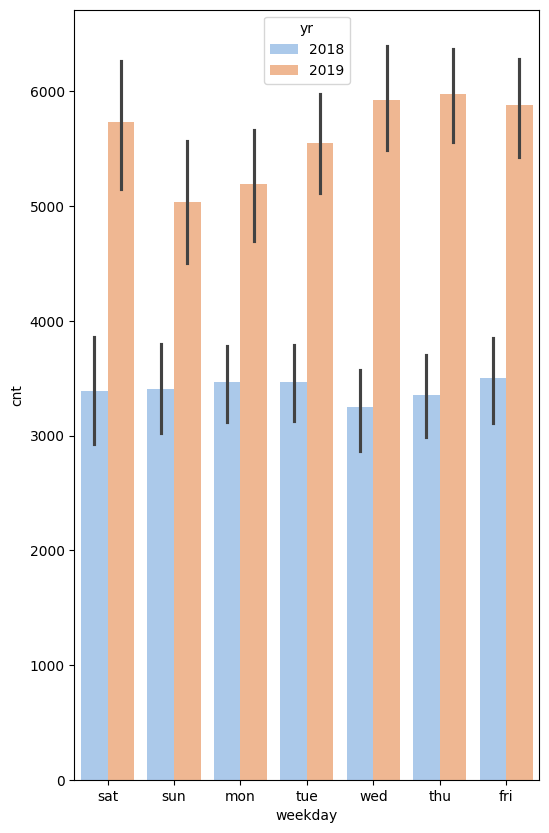

In [350]:
# number of rentals in different days of a week in different year
plt.figure(figsize=[6,10])
plot_bar_graph(bike.weekday,year)

1. If we see the graph in year 2018 the count of rental in each day of a week is almost same which suggest that renting a bike doesn't depends on weekends.
2. In 2019 the the counts were reduced on Mon , Tue then again increase on Wed.

There is a high chance that people rent a bike not only to do a trip on weekdays but also to travel to office and other places on a weekdays. 

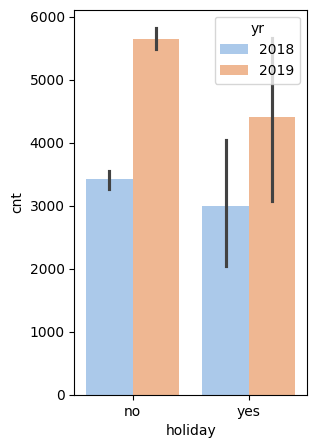

In [351]:
# number of rentals for a holiday in different year
plt.figure(figsize=[3,5])
plot_bar_graph(holiday,year)

It seems that people not uses rental to in holidays instead more people wanted to stay with their family on a holiday.
<br>People book rentals to travel to office and other place after the office when that perticular day is not a holiday.

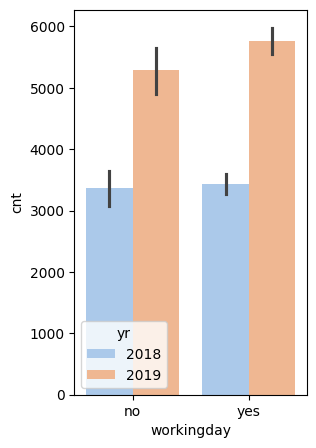

In [352]:
# number of rentals on a working in different year
plt.figure(figsize=[3,5])
plot_bar_graph(workingday,year)

As we suspected the number of rentals is more in working days, this is mostly in 2019 data.
<br> The 2018 data are comparables between yes and no.
<br> This due to the reason that on working days the charges were little less and while on weekends the chareges are little higher.

##### DATA VISUALIZATION OF NUMERICALS COLUMN

In [353]:
num_cols=['temp','atemp','hum','windspeed']

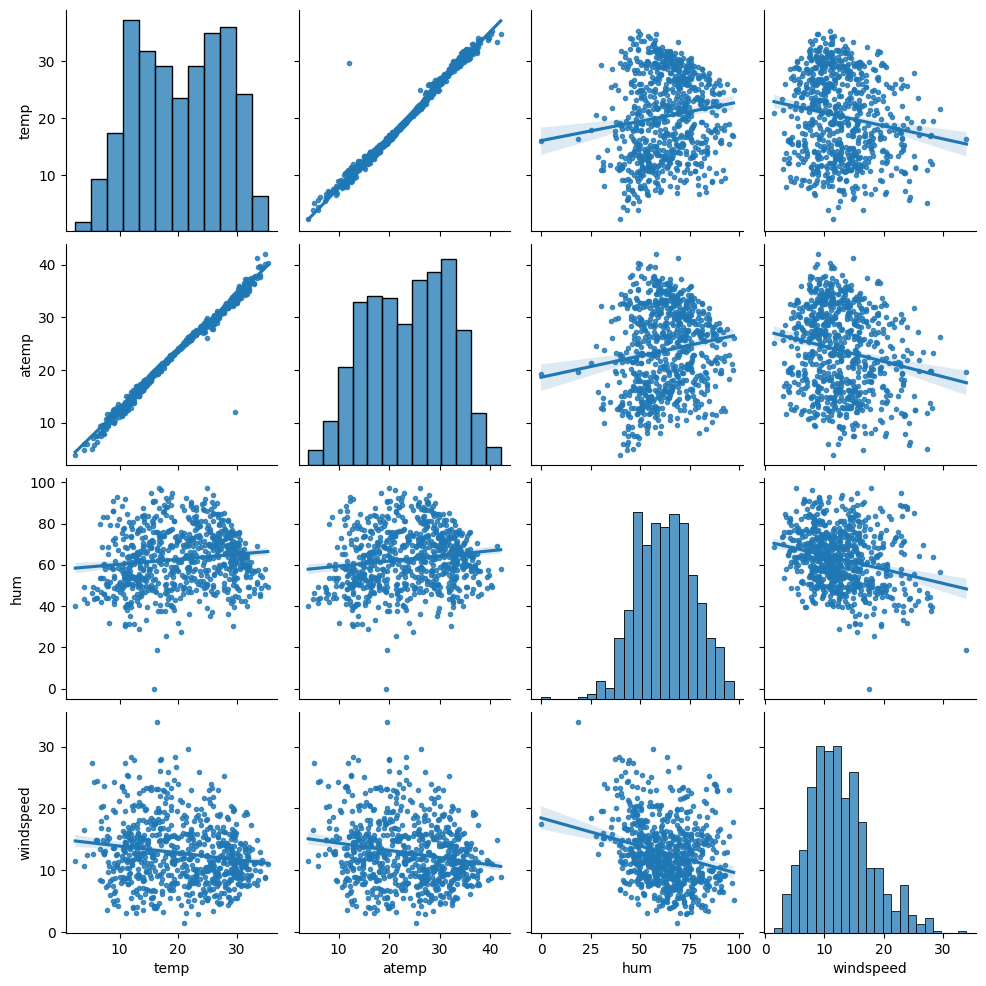

In [354]:
sns.pairplot(bike[num_cols],kind='reg',markers=".")

In [355]:
bike[num_cols].corr()

,temp,atemp,hum,windspeed
temp,1.000000,0.991696,0.128565,-0.158186
atemp,0.991696,1.000000,0.141512,-0.183876
hum,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.158186,-0.183876,-0.248506,1.000000


<Axes: >

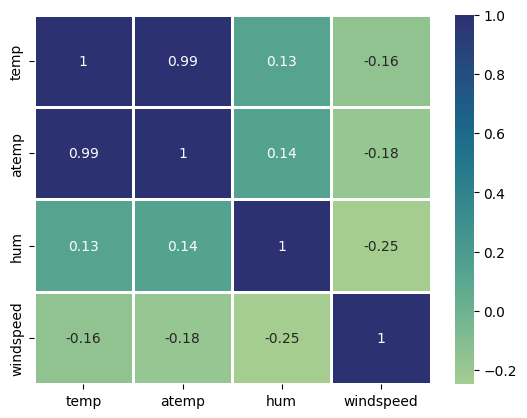

In [356]:
sns.heatmap(bike[num_cols].corr(),annot=True,cmap="crest",linewidths=1)

1. We can see that there is strong correlation between  atemp and temp almost equals to 1.
2. There is a very less positive correlation between humidity and temp columns as the humidity increase we feel more heat. 
So even if the temperature in 27 degree if there is high humidity in the air it feels like 34-35.
3. Thers is a negative correlation between windspeed and the other columns as the high widnspeed reduce temperation and wind can 
    also carries moisture with it.

##### Data Preparation for Linear Regression

In [357]:
#Create the dummy variables
bike=pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True,dtype=int)

In [358]:
bike = pd.get_dummies(data=bike,columns=["weathersit"],drop_first=True,dtype=int)

1. Dropping the first columns as (p-1) dummies can explain p categories.
2. In weathersit  we need all values
3. dtype=int so that get_dummies return 1 and 0 not True and False

In [359]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


##### TRAIN TEST SPLIT

In [360]:
df_train,df_test=train_test_split(bike,train_size=0.7, random_state=100)

##### DATA SCALING USING MIN MAX SCALER

In [361]:
#Creating an object
scaler=MinMaxScaler()

In [362]:
#Lest see the ststistics of the dataframe before selecting the columns for normalization
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [363]:
#create a list of variables we want to transform, Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numericals= ['temp','atemp','hum','windspeed','cnt']

In [364]:
#fit on the data and store it into the same columns
df_train[numericals]=scaler.fit_transform(df_train[numericals])

In [365]:
#Glace after scalling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [366]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### TRAINING THE MODEL

For training the model we need to check which should we pick, since we found high collinearity betwee temp and atemp and humidity.

Since we have scaled the data , now lets revisit the correlation between all the predictor variables

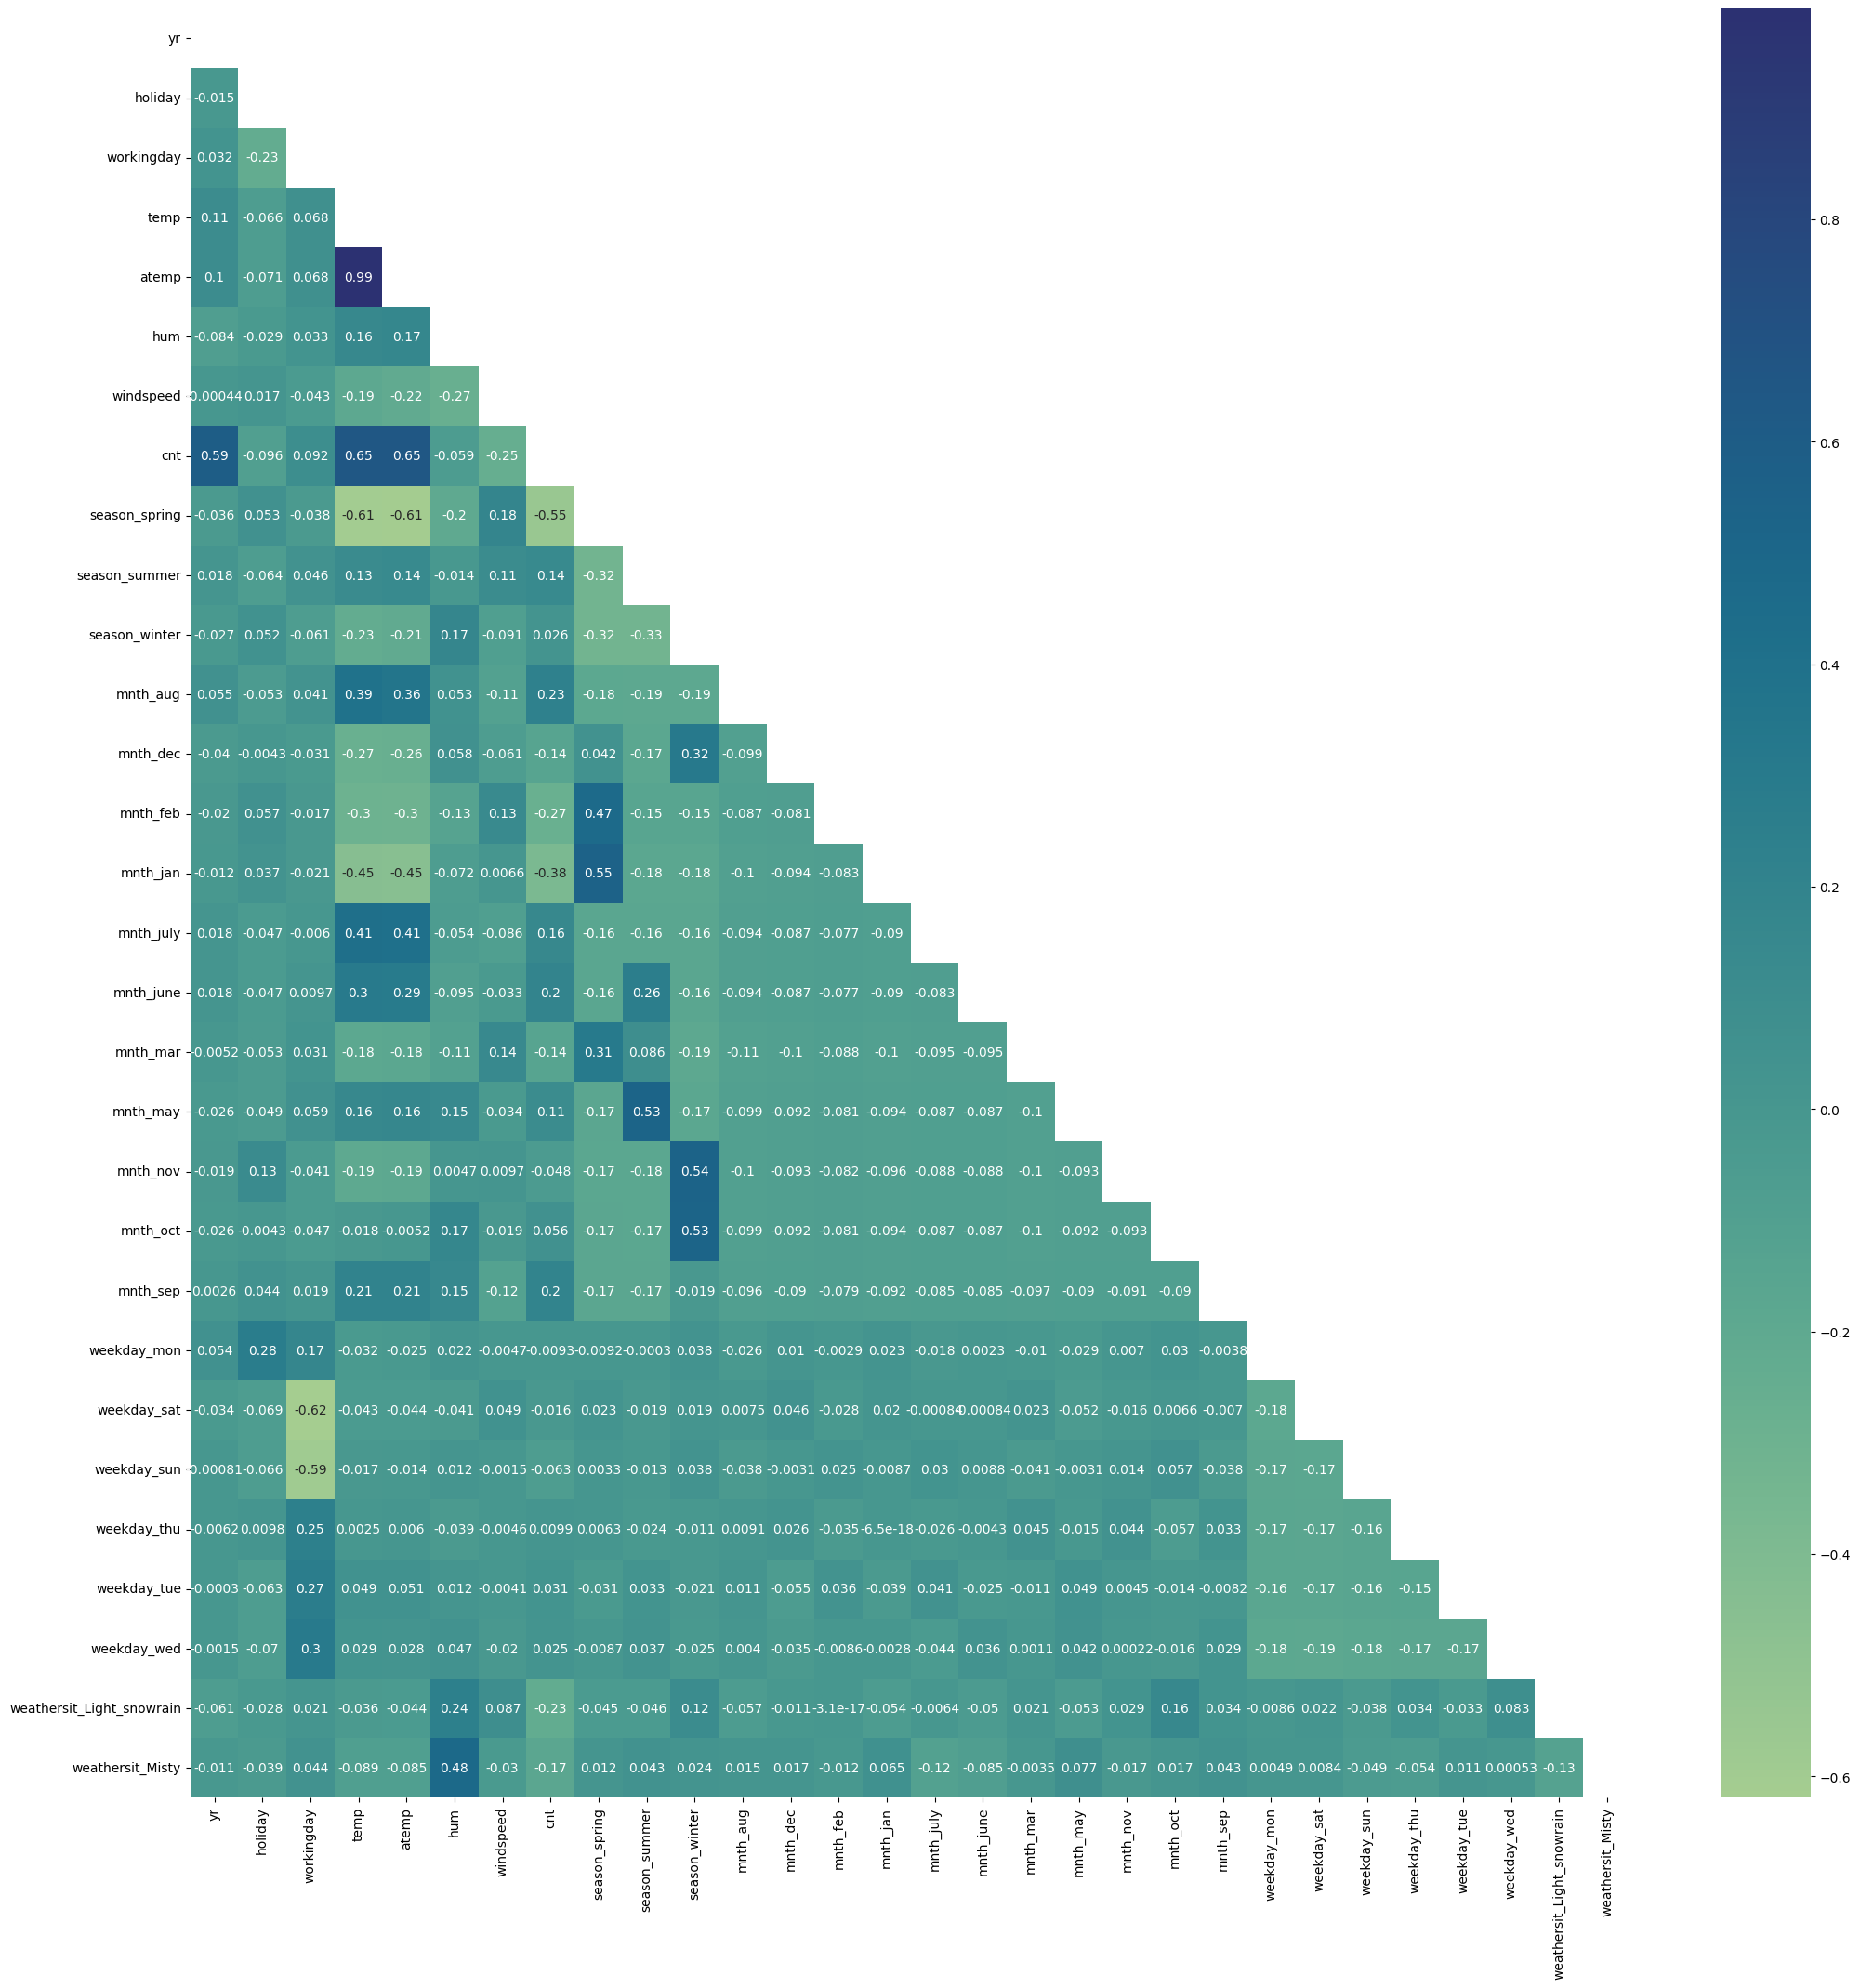

In [367]:
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="crest", mask=matrix)
plt.show()

Now we have the better picture of multicollinearity between the several predictor variables

Since we have multicollinearity within the predictor so we will decide which parameters to keep based on VIF and p-value w.r.t other variables¶

##### We can use RECURSIVE FEATURE ELIMINATION METHOD

###### We are using scikit learn first

In [368]:
#Create a model object
lm=LinearRegression()

In [369]:
#popping out the cnt column and store it in y_train
y_train=df_train.pop('cnt')

In [370]:
# rmaining column storing it into X_train
X_train=df_train

In [371]:
# fit the model
lm=lm.fit(X_train,y_train)

In [372]:
ref=RFE(lm,n_features_to_select=15)

In [373]:
ref=ref.fit(X_train,y_train)

In [374]:
## TO FIX 'zip' object is not callable
# del list

In [375]:
list(zip(X_train.columns,ref.support_, ref.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [376]:
#selected columns where RANKING is 1
selected_cols=X_train.columns[ref.support_]


In [377]:
# Building model using statsmodel for detailed statistics with selected columns
X_train_rfe=X_train[selected_cols]
#adding constant
X_train_sm=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_sm)


In [378]:
lm=lm.fit()

In [379]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.22e-191
Time:                        14:00:55   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2519      0.036      6.969      0.000       0.181       0.323
yr                            0.2305      0.008     28.795      0.000       0.215       0.246
holiday                      -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                    0.0433      0.012      3.762      0.000       0.021       0.066
temp                          0.5096      0.034     14.837      0.000       0.442       0.577
hum                          -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                    -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring                -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer                 0.0508      0.015      3.423      0.001       0.022       0.080
season_winter                 0.0933      0.017      5.403      0.000       0.059       0.127
mnth_jan                     -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_july                    -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_sep                      0.0814      0.016      4.945      0.000       0.049       0.114
weekday_sat                   0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After deleting temp column the P value of other features were less than 0.05. Hence we can proceed with VIF

##### CALCULATE VIF (Variance Inflation Factor)

In [380]:
#Create a datafram that will contain the features with respective VIF
vif=pd.DataFrame()

In [381]:
#adding columns names as features
vif['Features']=X_train_sm.columns

In [382]:
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]

In [383]:
vif['VIF']=round(vif['VIF'],2)

In [384]:
vif=vif.sort_values(by='VIF',ascending=True)

In [385]:
vif

,Features,VIF
1,yr,1.04
2,holiday,1.16
6,windspeed,1.21
14,weathersit_Light_snowrain,1.25
12,mnth_sep,1.30
11,mnth_july,1.49
10,mnth_jan,1.57
15,weathersit_Misty,1.57
13,weekday_sat,1.78
3,workingday,1.88


In [386]:
X_train_sm.drop(['season_spring'],inplace=True,axis=1)

In [387]:
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_winter,mnth_jan,mnth_july,mnth_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


In [388]:
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y_train,X_train_sm)
lm=lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.98e-191
Time:                        14:01:20   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2011      0.030      6.739      0.000       0.142       0.260
yr                            0.2294      0.008     28.555      0.000       0.214       0.245
holiday                      -0.0596      0.027     -2.206      0.028      -0.113      -0.007
workingday                    0.0437      0.012      3.774      0.000       0.021       0.066
temp                          0.5676      0.025     22.556      0.000       0.518       0.617
hum                          -0.1659      0.037     -4.446      0.000      -0.239      -0.093
windspeed                    -0.1935      0.025     -7.606      0.000      -0.243      -0.144
season_summer                 0.0757      0.011      6.950      0.000       0.054       0.097
season_winter                 0.1255      0.011     11.081      0.000       0.103       0.148
mnth_jan                     -0.0393      0.017     -2.271      0.024      -0.073      -0.005
mnth_july                    -0.0442      0.018     -2.486      0.013      -0.079      -0.009
mnth_sep                      0.0928      0.016      5.847      0.000       0.062       0.124
weekday_sat                   0.0539      0.015      3.696      0.000       0.025       0.082
weathersit_Light_snowrain    -0.2433      0.026     -9.320      0.000      -0.295      -0.192
weathersit_Misty             -0.0541      0.010     -5.221      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       60.708   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.130
Skew:                          -0.660   Prob(JB):                     3.35e-29
Kurtosis:                       5.104   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=True)
vif

,Features,VIF
1,yr,1.03
2,holiday,1.16
6,windspeed,1.19
11,mnth_sep,1.19
13,weathersit_Light_snowrain,1.25
7,season_summer,1.41
10,mnth_july,1.43
8,season_winter,1.53
9,mnth_jan,1.55
14,weathersit_Misty,1.56


Since VIF of the remaing Features is less than 5. We do the residual analysis after that

##### RESIDUAL ANALYSIS AND PREDICTION

In [391]:
#Predict the y values using X_train_sm value
y_train_pred = lm.predict(X_train_sm)

In [392]:
#compute residual
residual=y_train-y_train_pred

<Axes: ylabel='Density'>

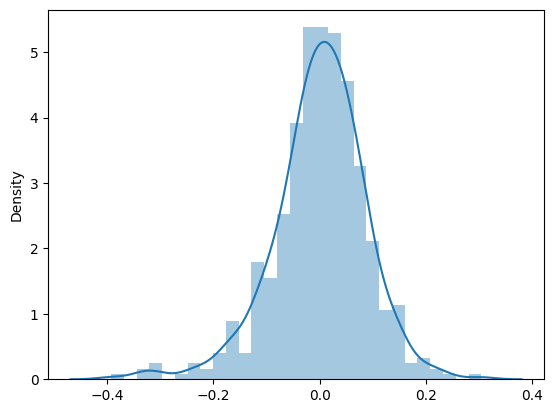

In [393]:
#Plotting the residual points
sns.distplot(residual)

##### The graph of residual shows normal distribution which shows our model is valid

##### Calculate the r2_score for train set

In [394]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8463471899540171

##### LINEARITY checks

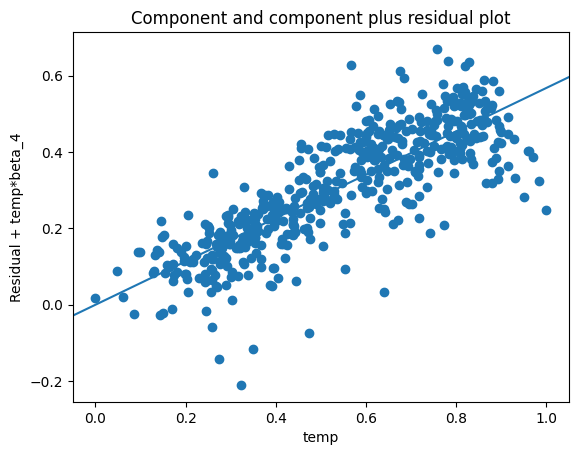

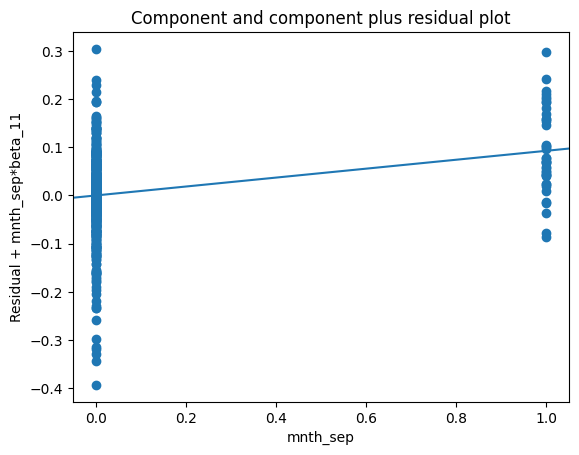

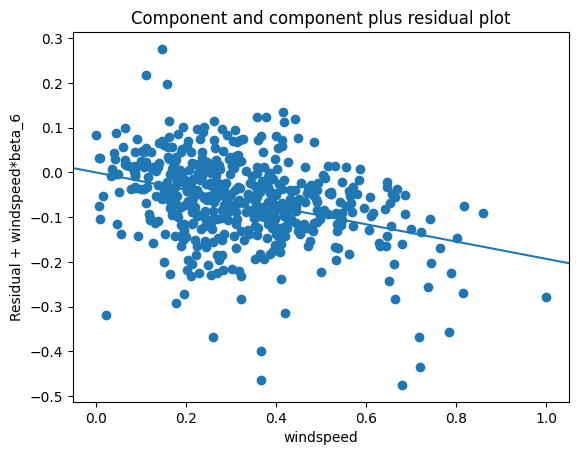

In [429]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot
sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm, 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

#### Homoscedasticity checks

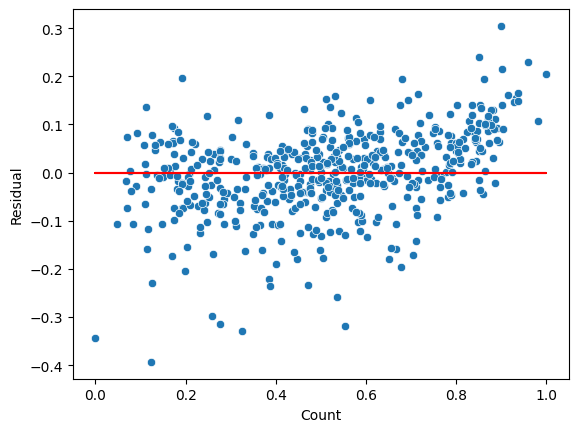

In [434]:
#making a scatterplot with the residuals against the dependent variable
#the error is constant across the values of the dependent variable
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

##### Independence of residuals

Durbin-Watson value of the model lm is 2.095, which signifies there is no autocorrelation.

##### PREDICTION AND EVALUATION ON THE TEST SET

In [395]:
df_test[numericals].head()

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968


In [396]:
#Apply transform function on test set which learned on train set
df_test[numericals]=scaler.transform(df_test[numericals])

In [397]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [398]:
y_test=df_test.pop('cnt')

In [399]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_sep',
       'weekday_sat', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

##### Keep only the required columns for test set directly

In [400]:
X_test=df_test[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_sep',
       'weekday_sat', 'weathersit_Light_snowrain', 'weathersit_Misty']]

In [401]:
#Add a constant
X_test_sm=sm.add_constant(X_test)

##### Predict the model

In [402]:
y_test_pred=lm.predict(X_test_sm)

##### Calculate the r2_score

In [403]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8053484636863371

In [439]:
round(lm.params,2)

const                        0.20
yr                           0.23
holiday                     -0.06
workingday                   0.04
temp                         0.57
hum                         -0.17
windspeed                   -0.19
season_summer                0.08
season_winter                0.13
mnth_jan                    -0.04
mnth_july                   -0.04
mnth_sep                     0.09
weekday_sat                  0.05
weathersit_Light_snowrain   -0.24
weathersit_Misty            -0.05
dtype: float64

#### cnt= 0.20 + 0.23 * yr - 0.06 * holiday + 0.04 * workingday + 0.57 * temp - 0.17 * hym -0.19 * windspeed + 0.08 * season_summer +  0.13 * season_winter - 0.04 * mnth_jan - 0.04 * mnth_july + 0.09 * mnth_sep + 0.05 * weekday_sat - 0.24 * weathersit_Light_snowrain - 0.05 * weathersit_Misty

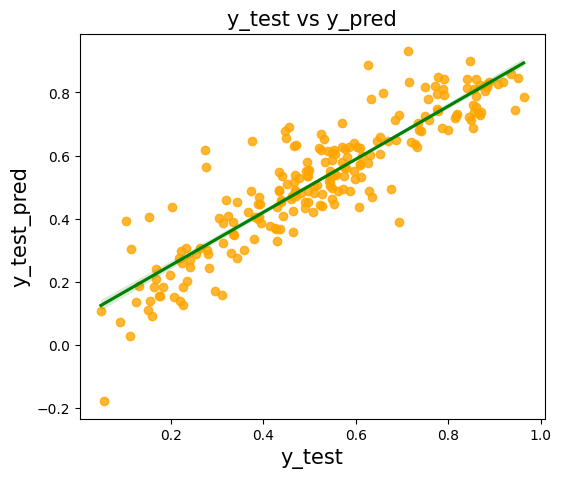

In [415]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure(figsize=[6,5])
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_test_pred', fontsize=15)
plt.show()

Comparision between Training and Testing dataset:
- <B>Train dataset r2_score          : 0.8463471899540171
- <B>Test dataset r2_score          : 0.8053484636863371

##### Analysing the above model, the comapany should focus on the following features:
1. Company should focus on expanding business during Summer and Winter.
2. Company should focus on expanding business during September.
3. Company should focus on expanding business on normal working day and weekend only sat.                  
4. The company have more rental count in 2019 compared to 2018. That means over the year more people have noticed the company. The company should spend more on the promotion through digital media or social media . So that they can get more customers.
5. There would be less bookings during. Holiday : People like to spend time with family or take rest.
6. hum : People don't like humid weather
7. mnth_jan and mnth_july : People don't like to rent in these months . As for Jan its just after the christmas hence people don't like it but july is the monsoon , people don't like to rent on monsoon.
8. Light_snowrain and Misty : People don't like these weather.